# 데이터 불러오기

In [1]:
import pandas as pd
import os
import re
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [3]:
def preprocess_df(df):
    df = df[['Numb', 'WAV', ' ', 'Segment ID', 'Total Evaluation', ' .1', ' .2']]
    df = df.rename(columns={'WAV':'WAV_start', ' ':'WAV_end', ' .1':'Valence', ' .2':'Arousal'})
    df.drop([0], inplace=True)
    df.reset_index(inplace=True, drop=True)
    return df

In [4]:
path = './ETRI_ERC/dataset/KEMDy20_v1_1/new/text'

ann = pd.read_pickle(path + '/text_data.pkl')
ann.head(10)

,segment_id,text,len_text
0,Sess01_script01_User002M_001,"나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...",52
1,Sess01_script01_User002M_002,전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...,86
2,Sess01_script01_User002M_003,어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때마...,61
3,Sess01_script01_User002M_004,거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇게...,98
4,Sess01_script01_User001F_001,아 친구들도?,7
5,Sess01_script01_User002M_005,응응 그래서 생일 때 그렇게 했던 경험이 있는데 그때가 이제 초등학교 때였는데 이제...,75
6,Sess01_script01_User002M_006,그래서 이제 막 지역 돌아다니면서 캔모아 빙수 있는 가게 저번에 광주 갔을 때도 있...,53
7,Sess01_script01_User002M_007,어 그래서 그런 가게들을 갈 때면 맨날 엄마 생각이 되게 자주 났어.,38
8,Sess01_script01_User002M_008,그래서 일부러 보이면 일부러 가기도 해.,22
9,Sess01_script01_User002M_009,거기 그때 먹었던 빙수 맛이 그대로인데 되게 맛있었거든.,31


# 데이터 전처리

In [5]:
dataset = ann

dataset.columns

Index(['segment_id', 'text', 'len_text'], dtype='object')

<Axes: >

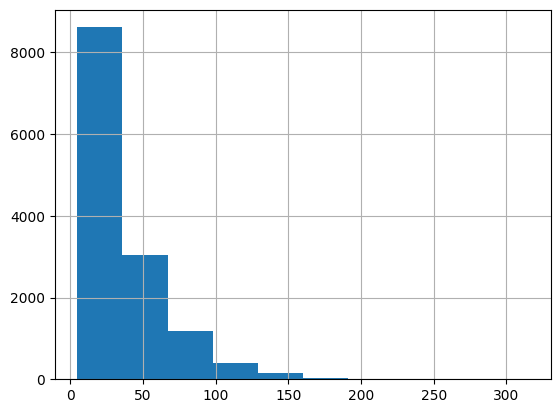

In [6]:
ann['len_text'].hist()

In [7]:
ann.head()

,segment_id,text,len_text
0,Sess01_script01_User002M_001,"나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...",52
1,Sess01_script01_User002M_002,전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...,86
2,Sess01_script01_User002M_003,어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때마...,61
3,Sess01_script01_User002M_004,거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇게...,98
4,Sess01_script01_User001F_001,아 친구들도?,7


In [9]:
dataset = pd.read_csv(os.path.join(path, '/text_temp.csv'))

In [10]:
dataset['text'].head()

0    나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...
1    전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...
2    어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때마...
3    거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇게...
4                                              아 친구들도?
Name: text, dtype: object

# 토큰화

In [ ]:
# konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [12]:
# 정상 동작 확인
from konlpy.tag import Mecab

mecab = Mecab()

In [13]:
# mecab
temp_me = dataset
temp_me['token'] = 0
for i in range(len(temp_me['text'])):
    t = temp_me['text'][i]
    m = mecab.pos(t)
    
    # 불용어 및 무의미한 형태소 제거
    words = [word for word, pos in m if pos != "SF" and pos != "SC" and pos != "JKO" and
             pos != "JKQ" and pos != "SN" and pos != "SH" and pos != "SL" and pos != "SC" and
             pos != "SSC" and pos != "SSO" and pos != "SE" and pos != "NP"]
    
    temp_me['token'][i] = words

print(temp_me.head(7))

<ipython-input-13-eff01b5ece6f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_me['token'][i] = words


   index  Numb  WAV_start    WAV_end                    Segment ID  \
0      0     1   3.578390  11.637391  Sess01_script01_User002M_001   
1      1     2  11.637391  23.334393  Sess01_script01_User002M_002   
2      2     3  23.334393  31.558392  Sess01_script01_User002M_003   
3      3     4  31.558392  42.970390  Sess01_script01_User002M_004   
4      4     5  42.777290  44.863290  Sess01_script01_User001F_001   
5      5     6  44.140392  52.776390  Sess01_script01_User002M_005   
6      6     7  52.776390  59.604393  Sess01_script01_User002M_006   

  Total Evaluation  Valence  Arousal  \
0          neutral      3.4      2.9   
1          neutral      3.1      2.9   
2          neutral      3.1      3.0   
3          neutral      3.7      3.1   
4          neutral      3.8      2.8   
5          neutral      3.0      3.2   
6          neutral      3.3      3.2   

                                                text  len_text  \
0  나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...

In [14]:
print(temp_me['text'].tail(10))
print(temp_me['token'].tail(10))

13452                                        그래서 로봇이 가정부야.
13453                                      근데 그 로봇이 굉장히 싸.
13454    그래서 집집마다 가정부가 다 있고 그 가정부가 일을 하는데 무조건 복종해야 되고 거...
13455                                            엄청 재밌었는데.
13456                               근데 그런 거 보니까 좀 소름 돋긴 해.
13457                      뭔가 막 그게 그니까 완전 대중화가 된 시대가 된 거야.
13458                                   그 게임 속 그 스토리 상에서는.
13459    근데 그게 너무 저렴하고 하니까 다 갈아 치우고 막 내 아내처럼, 그니까 내가 아내...
13460                             왜냐면 내 아내를 대신할 사람이 있는 거야.
13461                               그리고 내 딸을 보호해 줄 사람인 거고.
Name: text, dtype: object
13452                                 [그래서, 로봇, 이, 가정부, 야]
13453                               [근데, 그, 로봇, 이, 굉장히, 싸]
13454    [그래서, 집집, 마다, 가정부, 가, 다, 있, 고, 그, 가정부, 가, 일, 하...
13455                                      [엄청, 재밌, 었, 는데]
13456                   [근데, 그런, 거, 보, 니까, 좀, 소름, 돋, 긴, 해]
13457    [뭔가, 막, 그게, 그니까, 완전, 대중, 화, 가, 된, 시대, 가, 된, 거, 야]
13458                         

In [15]:
temp_me.head(10)

,index,Numb,WAV_start,WAV_end,Segment ID,Total Evaluation,Valence,Arousal,text,len_text,token
0,0,1,3.578390,11.637391,Sess01_script01_User002M_001,neutral,3.4,2.9,"나는 어 어머니, 엄마가 이제 생일 때마다 이제 미역국도 많이 해서 미역국을 되게 ...",52,"[는, 어, 어머니, 엄마, 가, 이제, 생일, 때, 마다, 이제, 미역국, 도, ..."
1,1,2,11.637391,23.334393,Sess01_script01_User002M_002,neutral,3.1,2.9,전에도 말했지만 그래서 미역국이랑 볶음김치 막 해주셔서 맨날 그렇게 차려주시는데 어...,86,"[전, 에, 도, 말, 했, 지만, 그래서, 미역국, 이랑, 볶음, 김치, 막, 해..."
2,2,3,23.334393,31.558392,Sess01_script01_User002M_003,neutral,3.1,3.0,어 응 거기를 되게 엄 집 앞에 그 조그만한 가게로 있었는데 거기를 엄청 생일 때마...,61,"[어, 응, 되게, 엄, 집, 앞, 에, 그, 조그만, 한, 가게, 로, 있, 었,..."
3,3,4,31.558392,42.970390,Sess01_script01_User002M_004,neutral,3.7,3.1,거기서 엄마랑 둘이 생일 파티 그냥 간단하게 하는 경우도 있었고 보 음 보통 그렇게...,98,"[서, 엄마, 랑, 둘, 이, 생일, 파티, 그냥, 간단, 하, 게, 하, 는, 경..."
4,4,5,42.777290,44.863290,Sess01_script01_User001F_001,neutral,3.8,2.8,아 친구들도?,7,"[아, 친구, 들, 도]"
5,5,6,44.140392,52.776390,Sess01_script01_User002M_005,neutral,3.0,3.2,응응 그래서 생일 때 그렇게 했던 경험이 있는데 그때가 이제 초등학교 때였는데 이제...,75,"[응, 응, 그래서, 생일, 때, 그렇, 게, 했, 던, 경험, 이, 있, 는데, ..."
6,6,7,52.776390,59.604393,Sess01_script01_User002M_006,neutral,3.3,3.2,그래서 이제 막 지역 돌아다니면서 캔모아 빙수 있는 가게 저번에 광주 갔을 때도 있...,53,"[그래서, 이제, 막, 지역, 돌아다니, 면서, 캔, 모아, 빙수, 있, 는, 가게..."
7,7,8,59.604393,64.877390,Sess01_script01_User002M_007,happy,4.0,3.3,어 그래서 그런 가게들을 갈 때면 맨날 엄마 생각이 되게 자주 났어.,38,"[어, 그래서, 그런, 가게, 들, 갈, 때, 면, 맨날, 엄마, 생각, 이, 되게..."
8,8,9,64.877390,67.058390,Sess01_script01_User002M_008,happy,3.9,3.6,그래서 일부러 보이면 일부러 가기도 해.,22,"[그래서, 일부러, 보이, 면, 일부러, 가, 기, 도, 해]"
9,9,10,67.058390,72.011390,Sess01_script01_User002M_009,happy,4.1,3.7,거기 그때 먹었던 빙수 맛이 그대로인데 되게 맛있었거든.,31,"[그때, 먹, 었, 던, 빙수, 맛, 이, 그대로, 인데, 되게, 맛있, 었, 거든]"


In [ ]:
import pickle
temp_me.to_pickle(path+'token_NonNP.pkl')